## Mount Google Drive


In [ ]:
import os
import sys
from google.colab import drive

# Change according to your google drive's file path
workdir = "/content/drive/MyDrive/Internship/Diabetes(NSTEMI)/Development"

try:
    # Mount Drive
    drive.mount('/content/drive', force_remount=True)

    # Change Current Directory
    os.chdir(workdir)
    print("Current Working Directory: ", os.getcwd())

except Exception as e:
    print("Error: Failed to Mount Google Drive : ", e)

Mounted at /content/drive
Current Working Directory:  /content/drive/MyDrive/Internship/Diabetes(NSTEMI)/Development


## Import Library

In [ ]:
import joblib
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss

In [ ]:
# Add the uitilities into path
project_root = os.path.abspath('./utilities')

if project_root not in sys.path:
    sys.path.append(project_root)

# Import evaluation from the evaluation.py
from evaluation import evaluate, nri_score, calibrate_and_plot_with_nri


## Data And Models

In [ ]:
# Import Files
X_train = joblib.load('./split/X_train.pkl')
y_train = joblib.load('./split/y_train.pkl')
X_test = joblib.load('./split/X_test.pkl')
y_test = joblib.load('./split/y_test.pkl')
X_calib = joblib.load('./split/X_cal.pkl')
y_calib = joblib.load('./split/y_cal.pkl')
timi_nstemi_test = joblib.load('./split/timi_nstemi_test.pkl')

In [ ]:
# Load Selected Features
selected_features = joblib.load('./selected_features/best_features.pkl')
print(selected_features)

['ptageatnotification', 'killipclass', 'crenal', 'cardiaccath', 'pci', 'bb', 'acei', 'arb', 'calcantagonist', 'bpsys', 'bpdias', 'ck', 'tc', 'ldlc', 'tg', 'fbg']


In [ ]:
# Selected Features
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_calib = X_calib[selected_features]

In [ ]:
# Combining timi score
# NRI Testing: NA value will be excluded during evaluation will not be counted for improvement
timi_score_test = timi_nstemi_test

In [ ]:
# Load all trained Models
logistic_regression_model = joblib.load('./models/logistic_regression.pkl')
random_forest_model = joblib.load('./models/random_forest.pkl')
svc_linear_model = joblib.load('./models/linear_svc.pkl')
xgboost_model = joblib.load('./models/xgboost.pkl')
gbm_model = joblib.load('./models/gbm.pkl')
stacked_all = joblib.load('./models/stacked_all.pkl')
stacked_ensemble = joblib.load('./models/stacked_ensemble.pkl')

## Calibration

In [ ]:
# Fixing label type error
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_calib = y_calib.astype(int)

### Logistic Regression Isotonic

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


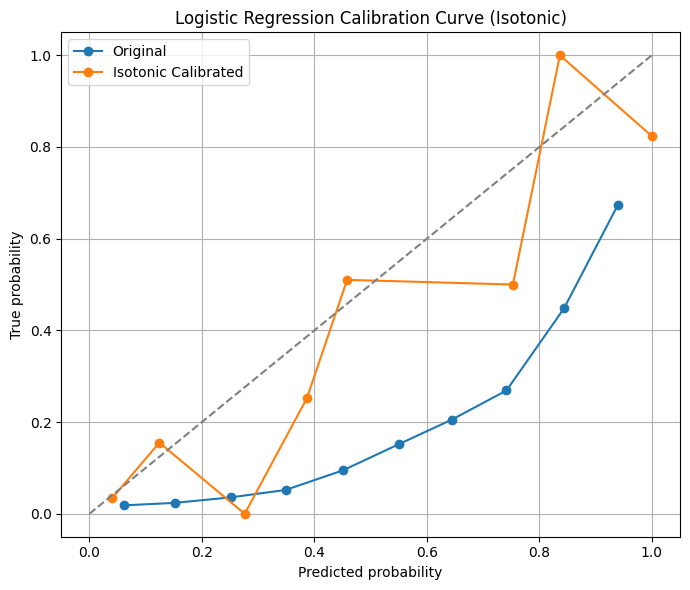


🔹 Threshold Used (Youden's J): 0.11
🧪 AUC-ROC Score (Train): 0.7826
✔️ AUC-ROC Score (Test): 0.7994 (95% CI: 0.7698 - 0.8265)
✔️ Accuracy: 0.6970
✔️ Balanced Accuracy: 0.7393
✔️ Precision: 0.2282
✔️ Recall (Sensitivity): 0.7928
✔️ Specificity: 0.6858
✔️ F1-score: 0.3544
✔️ F2-Score: 0.5304
✔️ Brier Score: 0.0792

Confusion Matrix:
 [[1469  673]
 [  52  199]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9658    0.6858    0.8021      2142
           1     0.2282    0.7928    0.3544       251

    accuracy                         0.6970      2393
   macro avg     0.5970    0.7393    0.5782      2393
weighted avg     0.8884    0.6970    0.7551      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 109
❌ Incorrectly Upgraded (0 → 1, actual = 0): 397
✔️ Correctly Downgraded (1 → 0, actual = 0): 520
❌ Incorrectly Downgraded (1 → 0, actual = 1): 2

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=logistic_regression_model,
    method='isotonic',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)

### Logistic Regression Platt

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


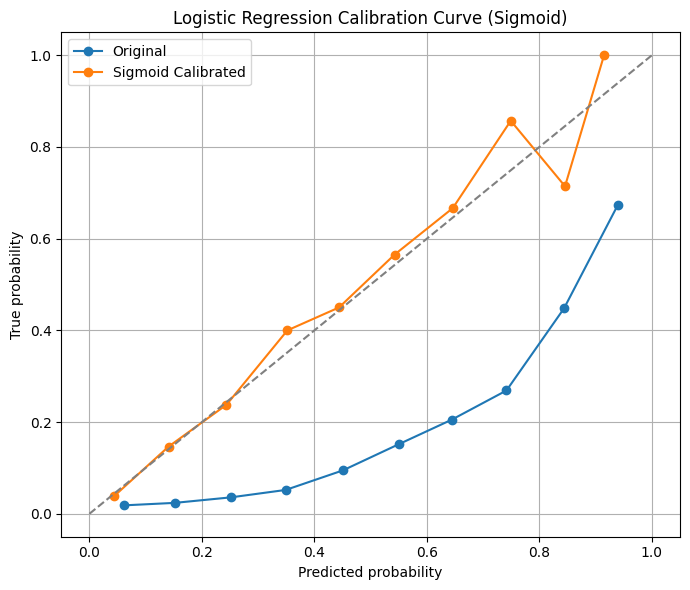


🔹 Threshold Used (Youden's J): 0.11
🧪 AUC-ROC Score (Train): 0.7708
✔️ AUC-ROC Score (Test): 0.8042 (95% CI: 0.7741 - 0.8317)
✔️ Accuracy: 0.7401
✔️ Balanced Accuracy: 0.7370
✔️ Precision: 0.2490
✔️ Recall (Sensitivity): 0.7331
✔️ Specificity: 0.7409
✔️ F1-score: 0.3717
✔️ F2-Score: 0.5278
✔️ Brier Score: 0.0775

Confusion Matrix:
 [[1587  555]
 [  67  184]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9595    0.7409    0.8361      2142
           1     0.2490    0.7331    0.3717       251

    accuracy                         0.7401      2393
   macro avg     0.6042    0.7370    0.6039      2393
weighted avg     0.8850    0.7401    0.7874      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 103
❌ Incorrectly Upgraded (0 → 1, actual = 0): 325
✔️ Correctly Downgraded (1 → 0, actual = 0): 564
❌ Incorrectly Downgraded (1 → 0, actual = 1): 3

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=logistic_regression_model,
    method='sigmoid',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)

### Random Forest Isotonic

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


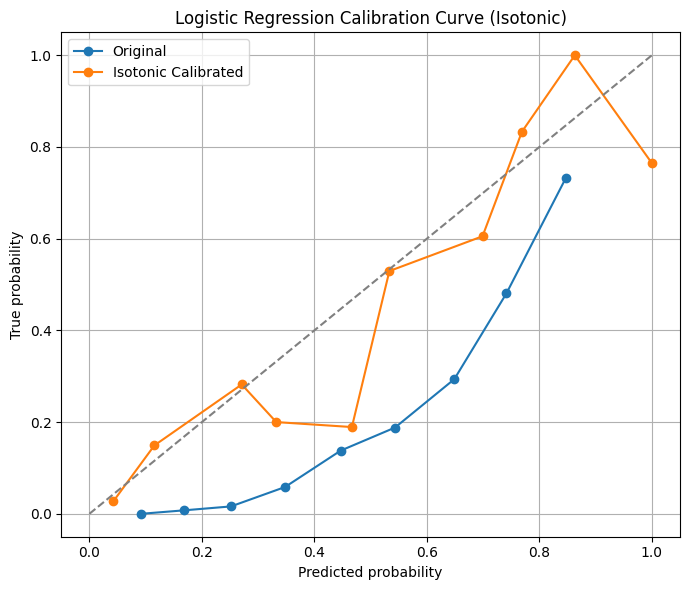


🔹 Threshold Used (Youden's J): 0.07
🧪 AUC-ROC Score (Train): 0.7750
✔️ AUC-ROC Score (Test): 0.8176 (95% CI: 0.7921 - 0.8427)
✔️ Accuracy: 0.6649
✔️ Balanced Accuracy: 0.7442
✔️ Precision: 0.2174
✔️ Recall (Sensitivity): 0.8446
✔️ Specificity: 0.6438
✔️ F1-score: 0.3458
✔️ F2-Score: 0.5356
✔️ Brier Score: 0.0774

Confusion Matrix:
 [[1379  763]
 [  39  212]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9725    0.6438    0.7747      2142
           1     0.2174    0.8446    0.3458       251

    accuracy                         0.6649      2393
   macro avg     0.5950    0.7442    0.5603      2393
weighted avg     0.8933    0.6649    0.7297      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 114
❌ Incorrectly Upgraded (0 → 1, actual = 0): 464
✔️ Correctly Downgraded (1 → 0, actual = 0): 495
❌ Incorrectly Downgraded (1 → 0, actual = 1): 1

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=random_forest_model,
    method='isotonic',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)

### Random Forest Platt

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


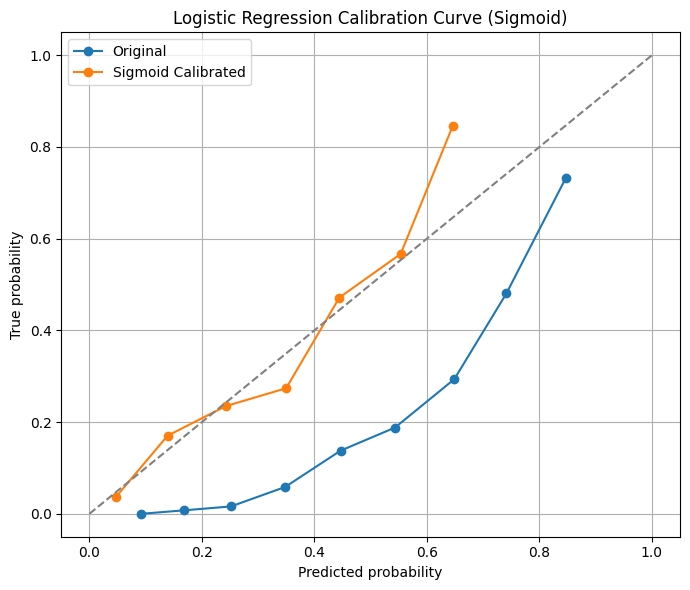


🔹 Threshold Used (Youden's J): 0.11
🧪 AUC-ROC Score (Train): 0.7608
✔️ AUC-ROC Score (Test): 0.8239 (95% CI: 0.7972 - 0.8488)
✔️ Accuracy: 0.7668
✔️ Balanced Accuracy: 0.7484
✔️ Precision: 0.2712
✔️ Recall (Sensitivity): 0.7251
✔️ Specificity: 0.7717
✔️ F1-score: 0.3948
✔️ F2-Score: 0.5433
✔️ Brier Score: 0.0765

Confusion Matrix:
 [[1653  489]
 [  69  182]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9599    0.7717    0.8556      2142
           1     0.2712    0.7251    0.3948       251

    accuracy                         0.7668      2393
   macro avg     0.6156    0.7484    0.6252      2393
weighted avg     0.8877    0.7668    0.8073      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 102
❌ Incorrectly Upgraded (0 → 1, actual = 0): 303
✔️ Correctly Downgraded (1 → 0, actual = 0): 607
❌ Incorrectly Downgraded (1 → 0, actual = 1): 3

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=random_forest_model,
    method='sigmoid',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)

### SVC Isotonic

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


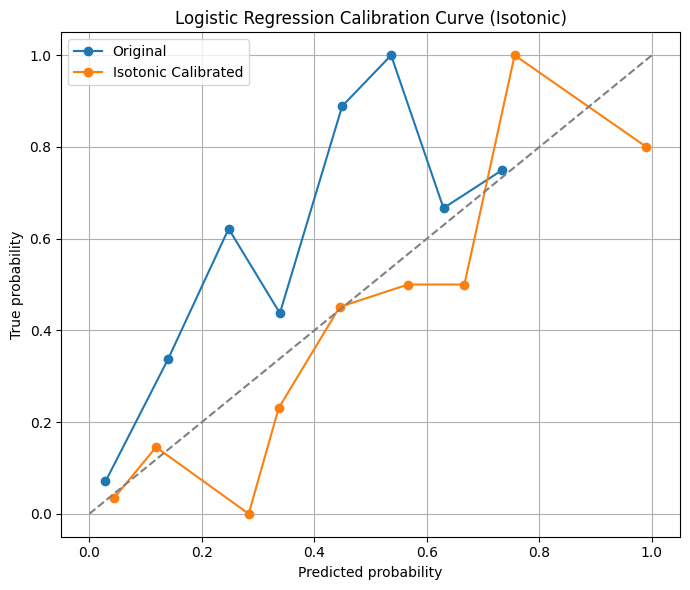


🔹 Threshold Used (Youden's J): 0.10
🧪 AUC-ROC Score (Train): 0.7775
✔️ AUC-ROC Score (Test): 0.8083 (95% CI: 0.7802 - 0.8360)
✔️ Accuracy: 0.6841
✔️ Balanced Accuracy: 0.7338
✔️ Precision: 0.2210
✔️ Recall (Sensitivity): 0.7968
✔️ Specificity: 0.6709
✔️ F1-score: 0.3460
✔️ F2-Score: 0.5238
✔️ Brier Score: 0.0775

Confusion Matrix:
 [[1437  705]
 [  51  200]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9657    0.6709    0.7917      2142
           1     0.2210    0.7968    0.3460       251

    accuracy                         0.6841      2393
   macro avg     0.5934    0.7338    0.5689      2393
weighted avg     0.8876    0.6841    0.7450      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 109
❌ Incorrectly Upgraded (0 → 1, actual = 0): 414
✔️ Correctly Downgraded (1 → 0, actual = 0): 506
❌ Incorrectly Downgraded (1 → 0, actual = 1): 2

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=svc_linear_model,
    method='isotonic',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)

### SVC Platt

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


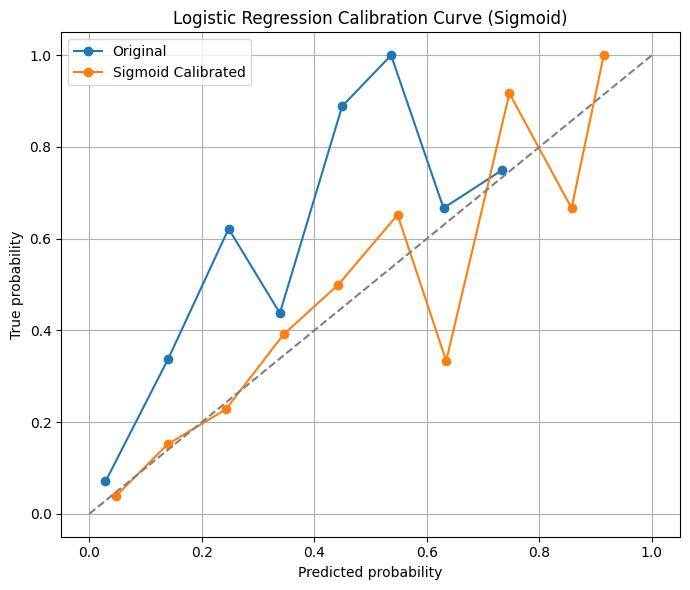


🔹 Threshold Used (Youden's J): 0.10
🧪 AUC-ROC Score (Train): 0.7653
✔️ AUC-ROC Score (Test): 0.8138 (95% CI: 0.7856 - 0.8406)
✔️ Accuracy: 0.7229
✔️ Balanced Accuracy: 0.7380
✔️ Precision: 0.2399
✔️ Recall (Sensitivity): 0.7570
✔️ Specificity: 0.7190
✔️ F1-score: 0.3643
✔️ F2-Score: 0.5290
✔️ Brier Score: 0.0768

Confusion Matrix:
 [[1540  602]
 [  61  190]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9619    0.7190    0.8229      2142
           1     0.2399    0.7570    0.3643       251

    accuracy                         0.7229      2393
   macro avg     0.6009    0.7380    0.5936      2393
weighted avg     0.8862    0.7229    0.7748      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 104
❌ Incorrectly Upgraded (0 → 1, actual = 0): 354
✔️ Correctly Downgraded (1 → 0, actual = 0): 548
❌ Incorrectly Downgraded (1 → 0, actual = 1): 3

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=svc_linear_model,
    method='sigmoid',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)

### Xgboost Isotonic

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


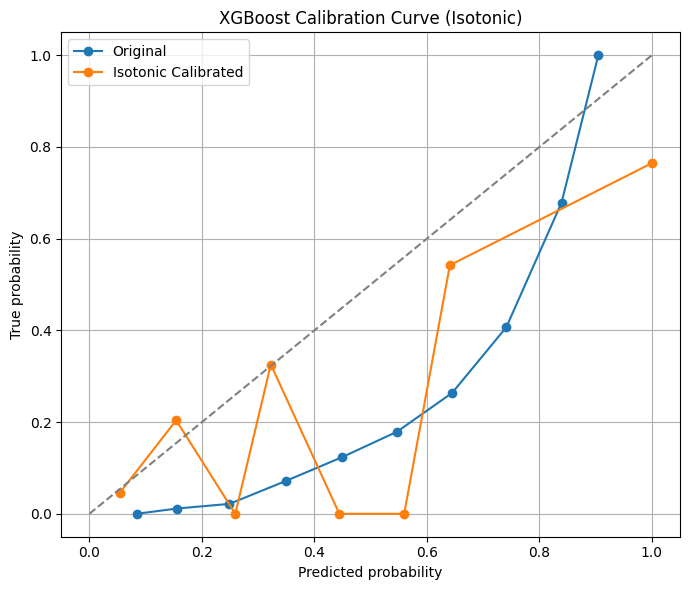


🔹 Threshold Used (Youden's J): 0.09
🧪 AUC-ROC Score (Train): 0.7687
✔️ AUC-ROC Score (Test): 0.8213 (95% CI: 0.7947 - 0.8443)
✔️ Accuracy: 0.7355
✔️ Balanced Accuracy: 0.7520
✔️ Precision: 0.2519
✔️ Recall (Sensitivity): 0.7729
✔️ Specificity: 0.7311
✔️ F1-score: 0.3800
✔️ F2-Score: 0.5468
✔️ Brier Score: 0.0784

Confusion Matrix:
 [[1566  576]
 [  57  194]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9649    0.7311    0.8319      2142
           1     0.2519    0.7729    0.3800       251

    accuracy                         0.7355      2393
   macro avg     0.6084    0.7520    0.6059      2393
weighted avg     0.8901    0.7355    0.7845      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 101
❌ Incorrectly Upgraded (0 → 1, actual = 0): 347
✔️ Correctly Downgraded (1 → 0, actual = 0): 566
❌ Incorrectly Downgraded (1 → 0, actual = 1): 2

In [ ]:
xgb_calibrator = calibrate_and_plot_with_nri(
    estimator=xgboost_model,
    method='isotonic',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="XGBoost"
)

In [ ]:
joblib.dump(xgb_calibrator, "./calibrated_models/xgboost_isotonic_calibrated.joblib")

['./calibrated_models/xgboost_isotonic_calibrated.joblib']

### Xgboost Platt

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


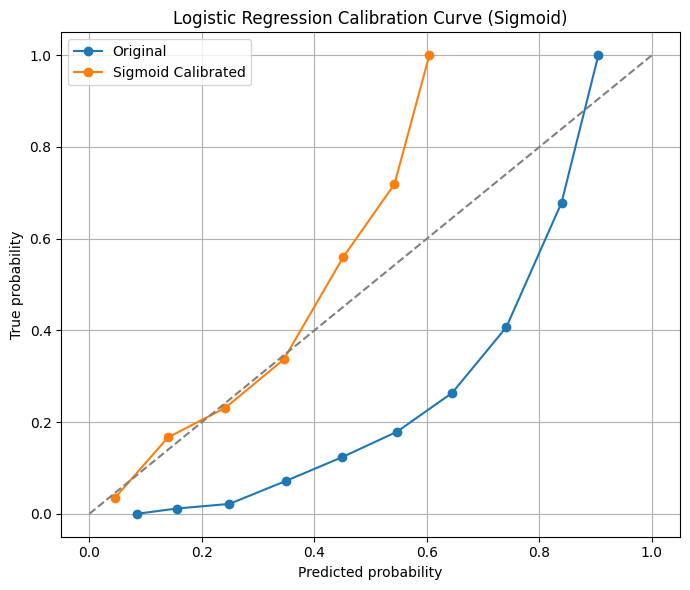


🔹 Threshold Used (Youden's J): 0.10
🧪 AUC-ROC Score (Train): 0.7571
✔️ AUC-ROC Score (Test): 0.8243 (95% CI: 0.7978 - 0.8483)
✔️ Accuracy: 0.7355
✔️ Balanced Accuracy: 0.7520
✔️ Precision: 0.2519
✔️ Recall (Sensitivity): 0.7729
✔️ Specificity: 0.7311
✔️ F1-score: 0.3800
✔️ F2-Score: 0.5468
✔️ Brier Score: 0.0771

Confusion Matrix:
 [[1566  576]
 [  57  194]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9649    0.7311    0.8319      2142
           1     0.2519    0.7729    0.3800       251

    accuracy                         0.7355      2393
   macro avg     0.6084    0.7520    0.6059      2393
weighted avg     0.8901    0.7355    0.7845      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 101
❌ Incorrectly Upgraded (0 → 1, actual = 0): 347
✔️ Correctly Downgraded (1 → 0, actual = 0): 566
❌ Incorrectly Downgraded (1 → 0, actual = 1): 2

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=xgboost_model,
    method='sigmoid',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)

### GBM Isotonic

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


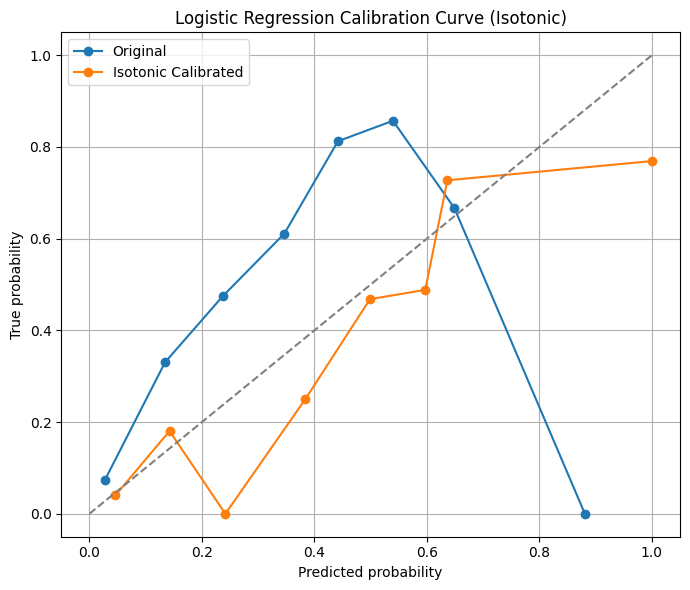


🔹 Threshold Used (Youden's J): 0.09
🧪 AUC-ROC Score (Train): 0.7835
✔️ AUC-ROC Score (Test): 0.8107 (95% CI: 0.7816 - 0.8365)
✔️ Accuracy: 0.7413
✔️ Balanced Accuracy: 0.7430
✔️ Precision: 0.2520
✔️ Recall (Sensitivity): 0.7450
✔️ Specificity: 0.7409
✔️ F1-score: 0.3766
✔️ F2-Score: 0.5355
✔️ Brier Score: 0.0788

Confusion Matrix:
 [[1587  555]
 [  64  187]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9612    0.7409    0.8368      2142
           1     0.2520    0.7450    0.3766       251

    accuracy                         0.7413      2393
   macro avg     0.6066    0.7430    0.6067      2393
weighted avg     0.8868    0.7413    0.7885      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 103
❌ Incorrectly Upgraded (0 → 1, actual = 0): 330
✔️ Correctly Downgraded (1 → 0, actual = 0): 570
❌ Incorrectly Downgraded (1 → 0, actual = 1): 3

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=gbm_model,
    method='isotonic',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)

### GBM Platt Scaling

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


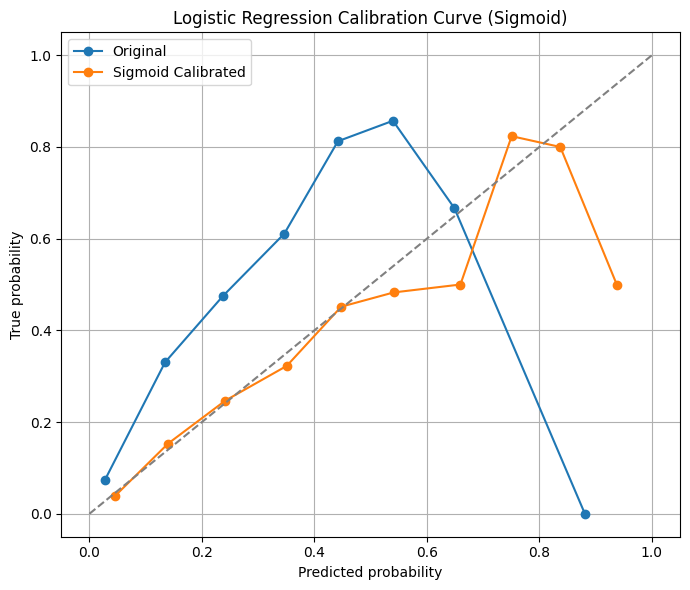


🔹 Threshold Used (Youden's J): 0.09
🧪 AUC-ROC Score (Train): 0.7725
✔️ AUC-ROC Score (Test): 0.8143 (95% CI: 0.7851 - 0.8399)
✔️ Accuracy: 0.6958
✔️ Balanced Accuracy: 0.7386
✔️ Precision: 0.2274
✔️ Recall (Sensitivity): 0.7928
✔️ Specificity: 0.6844
✔️ F1-score: 0.3535
✔️ F2-Score: 0.5295
✔️ Brier Score: 0.0774

Confusion Matrix:
 [[1466  676]
 [  52  199]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9657    0.6844    0.8011      2142
           1     0.2274    0.7928    0.3535       251

    accuracy                         0.6958      2393
   macro avg     0.5966    0.7386    0.5773      2393
weighted avg     0.8883    0.6958    0.7541      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 108
❌ Incorrectly Upgraded (0 → 1, actual = 0): 397
✔️ Correctly Downgraded (1 → 0, actual = 0): 516
❌ Incorrectly Downgraded (1 → 0, actual = 1): 2

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=gbm_model,
    method='sigmoid',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)

### Stacked Ensemble Isotonic

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


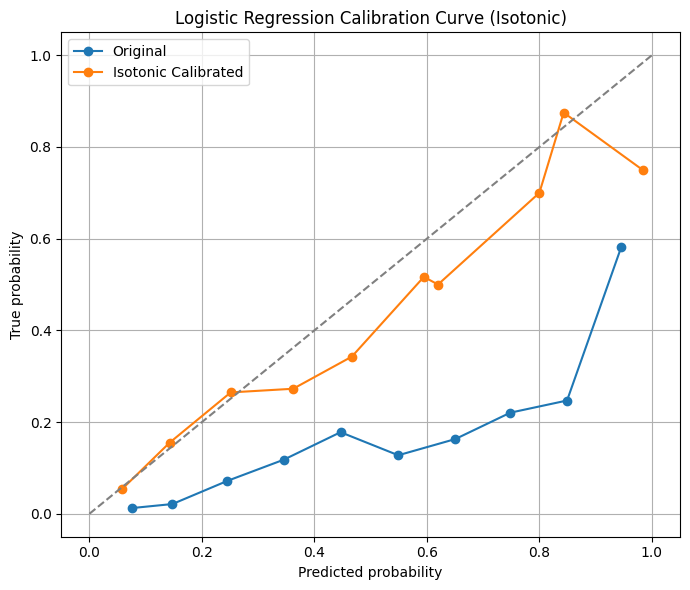


🔹 Threshold Used (Youden's J): 0.08
🧪 AUC-ROC Score (Train): 0.7639
✔️ AUC-ROC Score (Test): 0.7925 (95% CI: 0.7643 - 0.8189)
✔️ Accuracy: 0.5550
✔️ Balanced Accuracy: 0.7057
✔️ Precision: 0.1780
✔️ Recall (Sensitivity): 0.8964
✔️ Specificity: 0.5149
✔️ F1-score: 0.2970
✔️ F2-Score: 0.4960
✔️ Brier Score: 0.0789

Confusion Matrix:
 [[1103 1039]
 [  26  225]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9770    0.5149    0.6744      2142
           1     0.1780    0.8964    0.2970       251

    accuracy                         0.5550      2393
   macro avg     0.5775    0.7057    0.4857      2393
weighted avg     0.8932    0.5550    0.6348      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 125
❌ Incorrectly Upgraded (0 → 1, actual = 0): 632
✔️ Correctly Downgraded (1 → 0, actual = 0): 387
❌ Incorrectly Downgraded (1 → 0, actual = 1): 1

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=stacked_ensemble,
    method='isotonic',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)

### Stacked Ensemble Platt

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


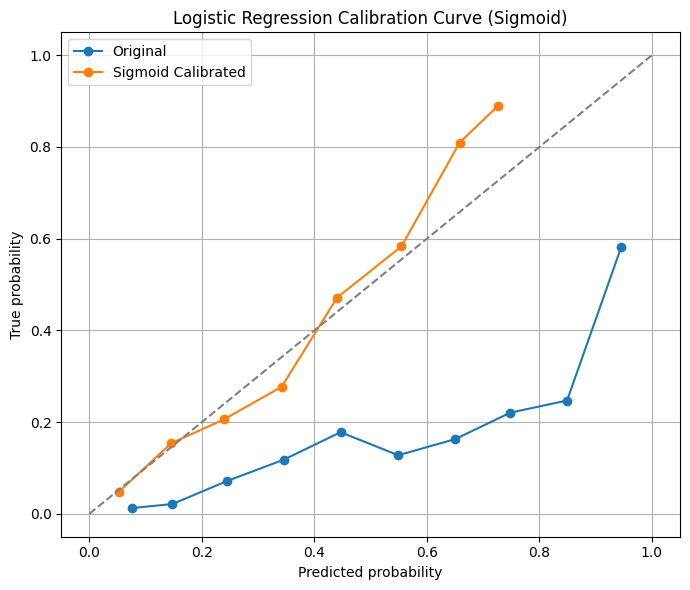


🔹 Threshold Used (Youden's J): 0.09
🧪 AUC-ROC Score (Train): 0.7509
✔️ AUC-ROC Score (Test): 0.8026 (95% CI: 0.7738 - 0.8294)
✔️ Accuracy: 0.7267
✔️ Balanced Accuracy: 0.7242
✔️ Precision: 0.2366
✔️ Recall (Sensitivity): 0.7211
✔️ Specificity: 0.7274
✔️ F1-score: 0.3563
✔️ F2-Score: 0.5116
✔️ Brier Score: 0.0779

Confusion Matrix:
 [[1558  584]
 [  70  181]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9570    0.7274    0.8265      2142
           1     0.2366    0.7211    0.3563       251

    accuracy                         0.7267      2393
   macro avg     0.5968    0.7242    0.5914      2393
weighted avg     0.8814    0.7267    0.7772      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 105
❌ Incorrectly Upgraded (0 → 1, actual = 0): 354
✔️ Correctly Downgraded (1 → 0, actual = 0): 563
❌ Incorrectly Downgraded (1 → 0, actual = 1): 4

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=stacked_ensemble,
    method='sigmoid',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)

### Stacked All Isotonic

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


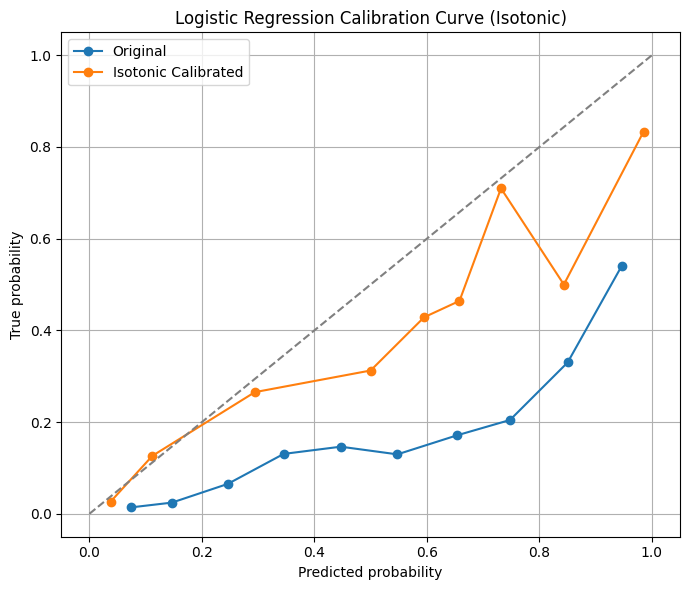


🔹 Threshold Used (Youden's J): 0.07
🧪 AUC-ROC Score (Train): 0.7611
✔️ AUC-ROC Score (Test): 0.7862 (95% CI: 0.7563 - 0.8145)
✔️ Accuracy: 0.5453
✔️ Balanced Accuracy: 0.7021
✔️ Precision: 0.1753
✔️ Recall (Sensitivity): 0.9004
✔️ Specificity: 0.5037
✔️ F1-score: 0.2935
✔️ F2-Score: 0.4928
✔️ Brier Score: 0.0807

Confusion Matrix:
 [[1079 1063]
 [  25  226]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9774    0.5037    0.6648      2142
           1     0.1753    0.9004    0.2935       251

    accuracy                         0.5453      2393
   macro avg     0.5763    0.7021    0.4792      2393
weighted avg     0.8932    0.5453    0.6259      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 125
❌ Incorrectly Upgraded (0 → 1, actual = 0): 652
✔️ Correctly Downgraded (1 → 0, actual = 0): 384
❌ Incorrectly Downgraded (1 → 0, actual = 1): 1

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=stacked_all,
    method='isotonic',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)

### Stacked All Platt Scaling

/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


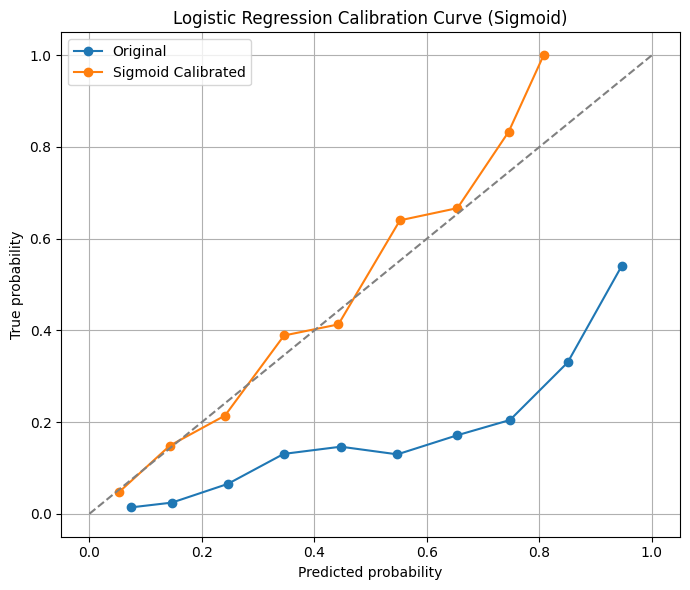


🔹 Threshold Used (Youden's J): 0.08
🧪 AUC-ROC Score (Train): 0.7485
✔️ AUC-ROC Score (Test): 0.7954 (95% CI: 0.7657 - 0.8242)
✔️ Accuracy: 0.6770
✔️ Balanced Accuracy: 0.7246
✔️ Precision: 0.2151
✔️ Recall (Sensitivity): 0.7849
✔️ Specificity: 0.6643
✔️ F1-score: 0.3376
✔️ F2-Score: 0.5130
✔️ Brier Score: 0.0791

Confusion Matrix:
 [[1423  719]
 [  54  197]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9634    0.6643    0.7864      2142
           1     0.2151    0.7849    0.3376       251

    accuracy                         0.6770      2393
   macro avg     0.5893    0.7246    0.5620      2393
weighted avg     0.8849    0.6770    0.7393      2393

🧹 Removed 5 rows with Old Model Prediction = -1 (missing values).

🔹 Reclassification Summary:
✔️ Correctly Upgraded (0 → 1, actual = 1): 109
❌ Incorrectly Upgraded (0 → 1, actual = 0): 435
✔️ Correctly Downgraded (1 → 0, actual = 0): 509
❌ Incorrectly Downgraded (1 → 0, actual = 1): 2

In [ ]:
results = calibrate_and_plot_with_nri(
    estimator=stacked_all,
    method='sigmoid',
    X_calib=X_calib, y_calib=y_calib,
    X_test=X_test, y_test=y_test,
    timi_score_test=timi_score_test,
    evaluate_fn=evaluate,
    nri_score_fn=nri_score,
    title_prefix="Logistic Regression"
)